### Phase 2 - EDA
----
DS5220 Supervised Machine Learning  
Fall 2024   
Instructor: Steve Morin PhD  
Nelson Farrell and Michael Massone    

-----
#### III. Explore the Data
1. Create a copy of the data for exploration.
2. Create a dedicated Jupyter notebook to keep a record of your data exploration.
3. Identify the target attribute.
4. Study each attribute and its characteristics.
    - The goal here is to prepare for setting the attribute configuration for machine learning.
    - We are looking for each attribute's role in supervised machine learning. 
    - Possible roles are:  
        • attributes with missingness above threshold  
        • non machine learning attributes  
        • attributes to exclude from machine learning      
5. Visualizations as needed.
6. Study the correlations and associations between attributes and between attributes and target.
    - This might inform your attribute configuration.
7. Study how you would solve the problem manually.
8. Identify additional data that would be useful (go back to “Get the Data”).
    - You are not required to get the additional data.
    - You should give this some thought and document what data might add to your project.

In [1]:
# Libraries
import os
import sys
from time import time
from pathlib import Path
from nbconvert import HTMLExporter
import nbformat

import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy.stats import zscore

In [2]:
# Set Working Dir
path = Path.cwd()
path_to_project_directory = path.parent
sys.path.insert(1, str(path_to_project_directory))
print(f"The working directory has been set to: {str(path_to_project_directory)}")


The working directory has been set to: /Users/nelsonfarrell/Documents/Northeastern/5220/final_project


In [3]:
# Modules
from modules.phase1_utils import * 

In [4]:
# Script runtime
start = time()

In [5]:
# Params

# Paths to Data
train_path = "data/data_splits/train_df.csv"


In [6]:
# Utility Functions


def separate_unique_columns(df):
    """
    This function separates columns of a DataFrame into those with 100% unique values and those with less than 100% unique values.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    dict: A dictionary with two keys: '100% unique' and '<100% unique'. Each contains a list of column names.
    """
    unique_cols = []
    non_unique_cols = []

    for column in df.columns:
        num_unique = df[column].nunique()
        total_values = df[column].size
        
        if num_unique == total_values:
            unique_cols.append(column)
        else:
            non_unique_cols.append(column)
    
    print("*****************************")
    print("non_ML_attr")
    for attr in unique_cols:
        print(attr)
    print("*****************************")
    print("ML_attr")
    for attr in non_unique_cols:
        print(attr)

    return {
        'non_ML_attr': unique_cols,
        'ML_attr': non_unique_cols
    }

def check_column_types_and_nans(df, threshold=0.2):
    '''
    Checks each column of a dataframe and returns a list of numerical attributes and nominal attributes, 
    along with NaN counts for each column
    
    Inputs:
        df(pd.DataFrame): Dataframe to be checked.
        threhsold(float): NAN ratio threshold to add cols to exclusion list. Default is 0.20.
    Out:
        dict{
            'numerical_cols': numerical_cols,     
            'nominal_cols': non_numerical_cols,       
            }
    '''
    
    numerical_cols = []
    num_nan_count = []
    non_numerical_cols = []
    nom_nan_count = []
    nan_above_thresold = []
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
            nan_count = df[col].isna().sum()
            num_nan_count.append(nan_count) # Count NaN values for the column
            nan_above_thresold.append(col) if nan_count/df.shape[0] > threshold else None
        else:
            non_numerical_cols.append(col)
            nan_count = df[col].isna().sum()
            nom_nan_count.append(nan_count)  
            nan_above_thresold.append(col) if nan_count/df.shape[0] > threshold else None

    
    # Print out the results with Dtype and NaN counts
    print("*"*50)
    print("Numerical Columns:")
    if not numerical_cols:
        print("**NONE**")
    else:    
        for col, nan_count in zip(numerical_cols, num_nan_count):
            print(f"{col} \n - dtype: {df[col].dtype} \n - NaN count: {nan_count} \n - NaN ratio: {nan_count/df.shape[0]}")
    
    print("*"*50)    
    print("Non-Numerical Columns:")
    if not non_numerical_cols:
        print("**NONE**")
    else:
        for col, nan_count in zip(non_numerical_cols, nom_nan_count):
            print(f"{col} \n - dtype: {df[col].dtype} \n - NaN count: {nan_count} \n - NaN ratio: {nan_count/df.shape[0]}")

    print("*"*50)
    print(f"Columns with NAN ration greather than {threshold * 100}%:")
    if not nan_above_thresold:
        print("**NONE**")
    else:
        for col in nan_above_thresold:
            print(col)
            
    return {'numerical_cols': numerical_cols, 'nominal_cols': non_numerical_cols, 'nan_above_threshold': nan_above_thresold}


In [7]:
# Import data
train_df = pd.read_csv(str( path_to_project_directory /train_path))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            6454 non-null   int64  
 1   ID               6454 non-null   int64  
 2   Gender           6454 non-null   object 
 3   Ever_Married     6343 non-null   object 
 4   Age              6454 non-null   int64  
 5   Graduated        6395 non-null   object 
 6   Profession       6348 non-null   object 
 7   Work_Experience  5808 non-null   float64
 8   Spending_Score   6454 non-null   object 
 9   Family_Size      6190 non-null   float64
 10  Var_1            6394 non-null   object 
 11  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 605.2+ KB


In [8]:
col_info_dict = check_column_types_and_nans(train_df)

**************************************************
Numerical Columns:
index 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
ID 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
Age 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
Work_Experience 
 - dtype: float64 
 - NaN count: 646 
 - NaN ratio: 0.10009296560272699
Family_Size 
 - dtype: float64 
 - NaN count: 264 
 - NaN ratio: 0.040904865199876045
**************************************************
Non-Numerical Columns:
Gender 
 - dtype: object 
 - NaN count: 0 
 - NaN ratio: 0.0
Ever_Married 
 - dtype: object 
 - NaN count: 111 
 - NaN ratio: 0.017198636504493336
Graduated 
 - dtype: object 
 - NaN count: 59 
 - NaN ratio: 0.00914161760148745
Profession 
 - dtype: object 
 - NaN count: 106 
 - NaN ratio: 0.01642392314843508
Spending_Score 
 - dtype: object 
 - NaN count: 0 
 - NaN ratio: 0.0
Var_1 
 - dtype: object 
 - NaN count: 60 
 - NaN ratio: 0.009296560272699102
Segmentation 
 - dtype: object 
 - NaN count: 0 
 -

In [9]:
col_info_dict

{'numerical_cols': ['index', 'ID', 'Age', 'Work_Experience', 'Family_Size'],
 'nominal_cols': ['Gender',
  'Ever_Married',
  'Graduated',
  'Profession',
  'Spending_Score',
  'Var_1',
  'Segmentation'],
 'nan_above_threshold': []}

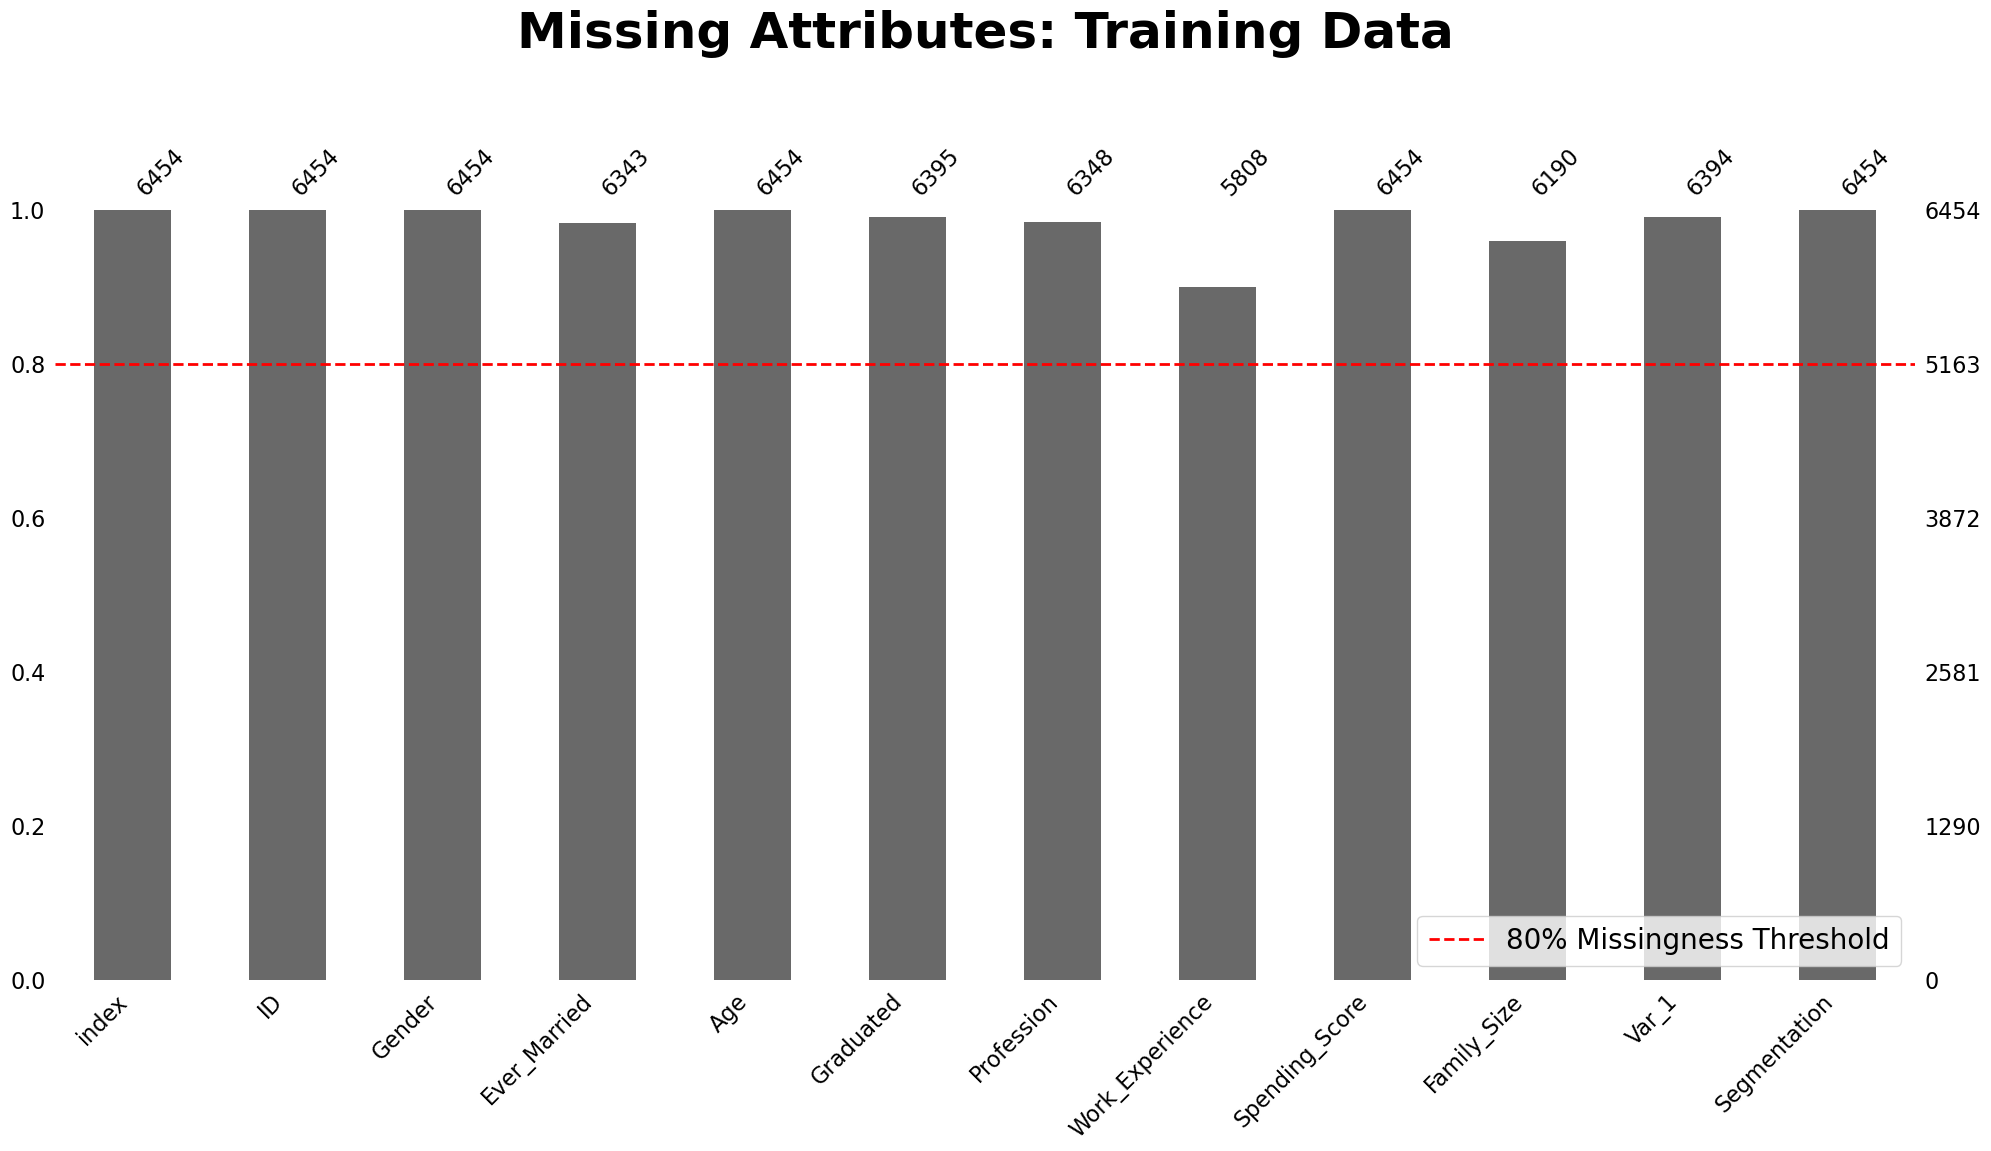

In [10]:
msno.bar(train_df)
plt.title("Missing Attributes: Training Data", fontsize = 36, weight = 'bold', y = 1.2)
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=2, label="80% Missingness Threshold")
plt.legend(loc='lower right', fontsize=20)
plt.show()

In [11]:
ml_attr_dict = separate_unique_columns(train_df)

*****************************
non_ML_attr
index
ID
*****************************
ML_attr
Gender
Ever_Married
Age
Graduated
Profession
Work_Experience
Spending_Score
Family_Size
Var_1
Segmentation


In [12]:
ml_attr_dict

{'non_ML_attr': ['index', 'ID'],
 'ML_attr': ['Gender',
  'Ever_Married',
  'Age',
  'Graduated',
  'Profession',
  'Work_Experience',
  'Spending_Score',
  'Family_Size',
  'Var_1',
  'Segmentation']}

In [13]:
# seperate numerical machine learning attributes
numerical_df = train_df[[col for col in col_info_dict['numerical_cols'] if col not in ml_attr_dict['non_ML_attr']]].copy()
numerical_df.info()

numerical_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              6454 non-null   int64  
 1   Work_Experience  5808 non-null   float64
 2   Family_Size      6190 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 151.4 KB


,Age,Work_Experience,Family_Size
0,32,9.0,1.0
1,72,NaN,2.0
2,33,1.0,4.0
3,48,0.0,6.0
4,28,9.0,1.0
5,45,3.0,3.0
6,43,0.0,1.0
7,28,1.0,3.0
8,38,4.0,1.0
9,33,7.0,5.0


____________________________________________________________________________________________________
Attribute: Age
____________________________________________________________________________________________________
count    6454.000000
mean       43.592036
std        16.672806
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

Outliers in Age:
None


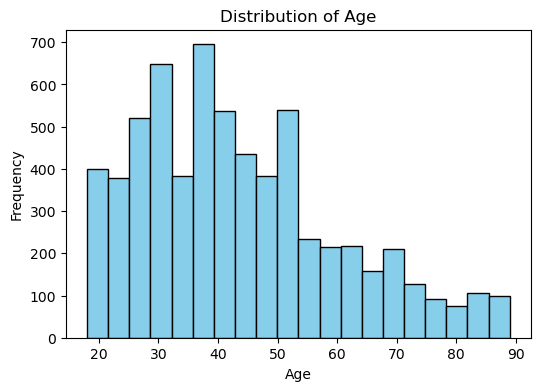

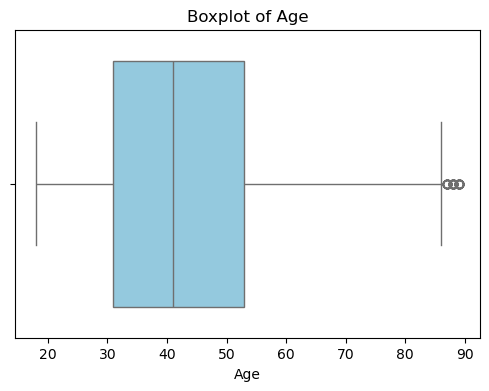

____________________________________________________________________________________________________
Attribute: Work_Experience
____________________________________________________________________________________________________
count    5808.000000
mean        2.671488
std         3.434175
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

Outliers in Work_Experience:
None


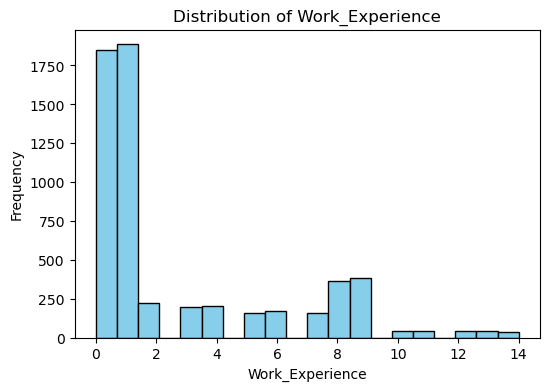

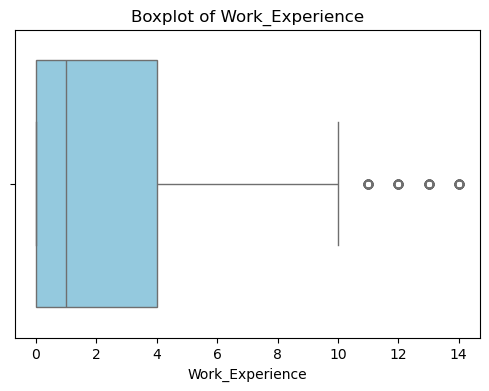

____________________________________________________________________________________________________
Attribute: Family_Size
____________________________________________________________________________________________________
count    6190.000000
mean        2.839742
std         1.531119
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

Outliers in Family_Size:
None


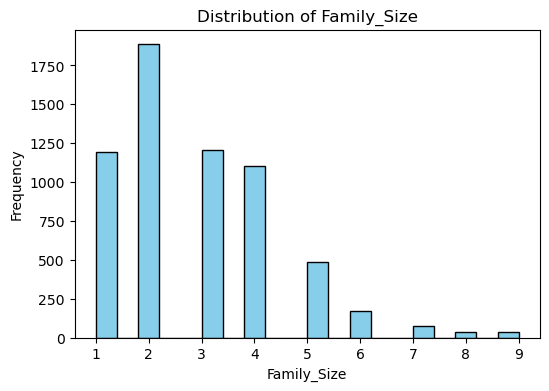

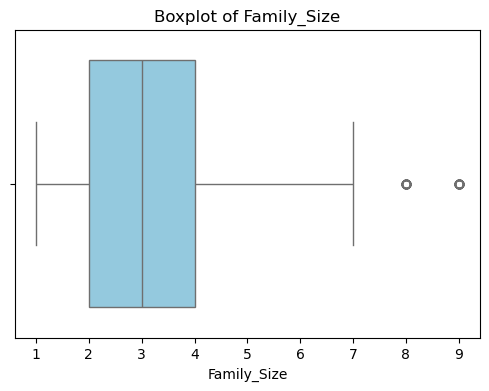

In [14]:
# numerical EDA

def plot_histogram(df, column, bins=20):
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.show()

def detect_outliers_zscore(df, column):
    z_scores = zscore(df[column])
    outliers = df[column][(z_scores > 3) | (z_scores < -3)]
    print(f'\nOutliers in {column}:\n{None if not list(outliers) else outliers}')

for col in numerical_df.columns:
    print(("_"*100))
    print(f'Attribute: {col}')
    print(("_"*100))
    print(numerical_df[col].describe())
    detect_outliers_zscore(numerical_df, col)
    plot_histogram(numerical_df, col)
    plot_boxplot(numerical_df, col)
    


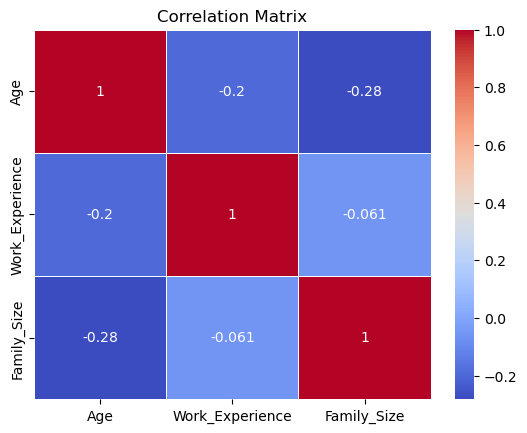

In [262]:
# Correlation
def plot_correlation_matrix(df):
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(numerical_df)

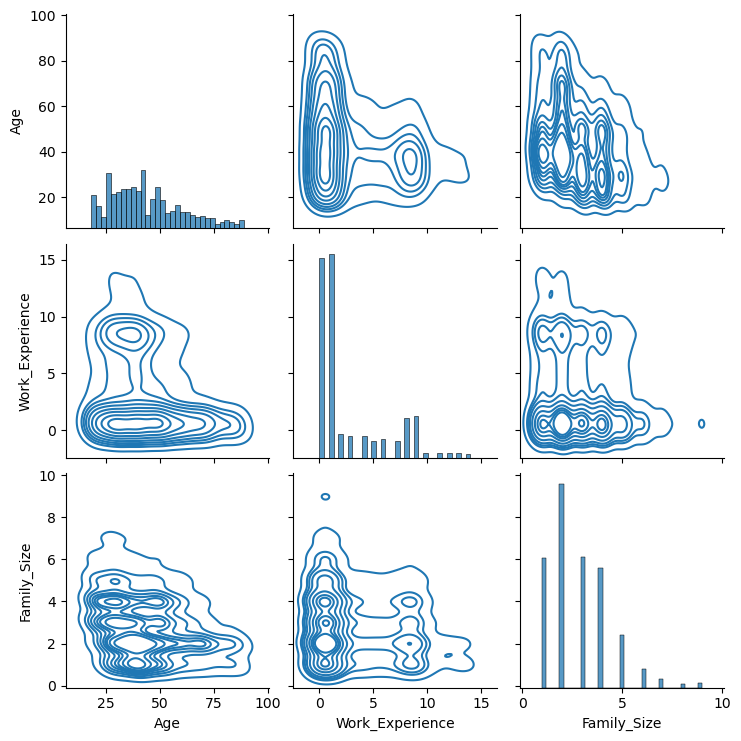

In [263]:
# Pairplots
def plot_pairplot(df):
    sns.pairplot(df, diag_kind="hist", kind="kde")
    plt.show()

plot_pairplot(numerical_df)

In [264]:
# seperate nominal machine learning attributes
nominal_df = train_df[[col for col in col_info_dict['nominal_cols'] if col not in ml_attr_dict['non_ML_attr']]].copy()
nominal_df.info()

nominal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          6454 non-null   object
 1   Ever_Married    6343 non-null   object
 2   Graduated       6395 non-null   object
 3   Profession      6348 non-null   object
 4   Spending_Score  6454 non-null   object
 5   Var_1           6394 non-null   object
 6   Segmentation    6454 non-null   object
dtypes: object(7)
memory usage: 353.1+ KB


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Female,No,Yes,Artist,Low,Cat_6,A
1,Male,Yes,Yes,Entertainment,Average,Cat_6,B
2,Female,No,Yes,Entertainment,Low,Cat_6,B
3,Female,Yes,Yes,Artist,Average,Cat_6,A
4,Female,Yes,No,Doctor,Low,Cat_7,A


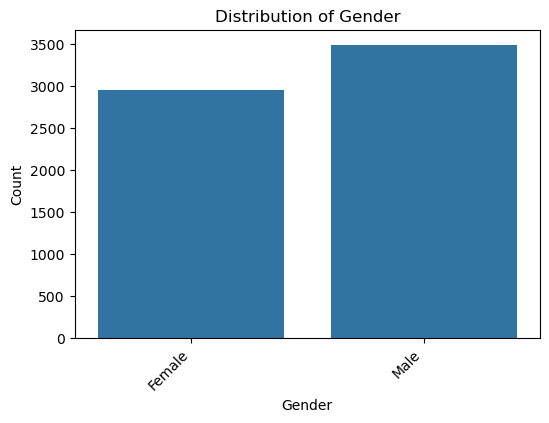

Frequency Distribution for Gender:
________________________________________
        Count  Frequency_Ratio (%)
Gender                            
Male     3493                 54.1
Female   2961                 45.9



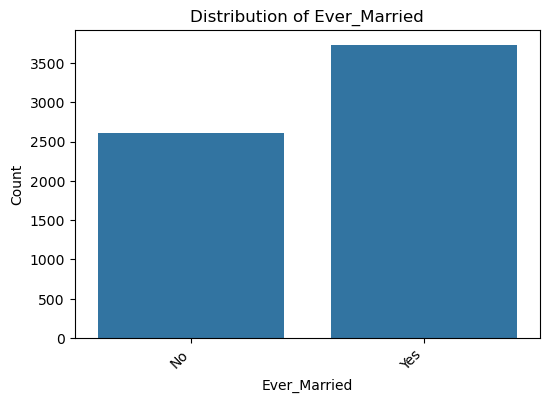

Frequency Distribution for Ever_Married:
________________________________________
              Count  Frequency_Ratio (%)
Ever_Married                            
Yes            3734                 58.9
No             2609                 41.1



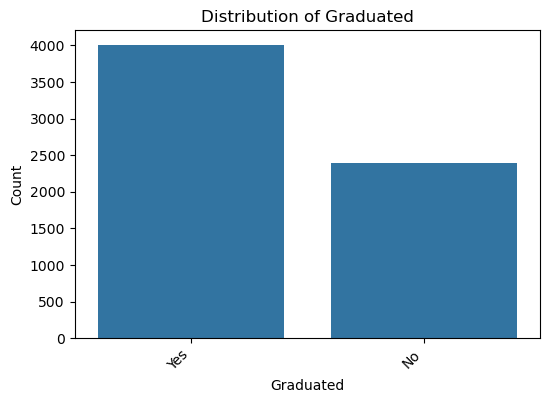

Frequency Distribution for Graduated:
________________________________________
           Count  Frequency_Ratio (%)
Graduated                            
Yes         4007                 62.7
No          2388                 37.3



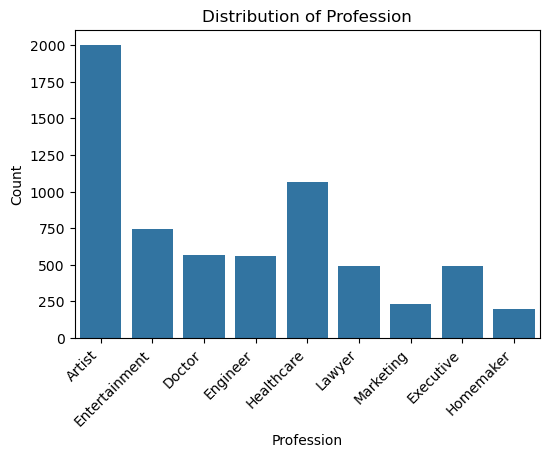

Frequency Distribution for Profession:
________________________________________
               Count  Frequency_Ratio (%)
Profession                               
Artist          2005                 31.6
Healthcare      1064                 16.8
Entertainment    745                 11.7
Doctor           567                  8.9
Engineer         562                  8.9
Lawyer           491                  7.7
Executive        489                  7.7
Marketing        230                  3.6
Homemaker        195                  3.1



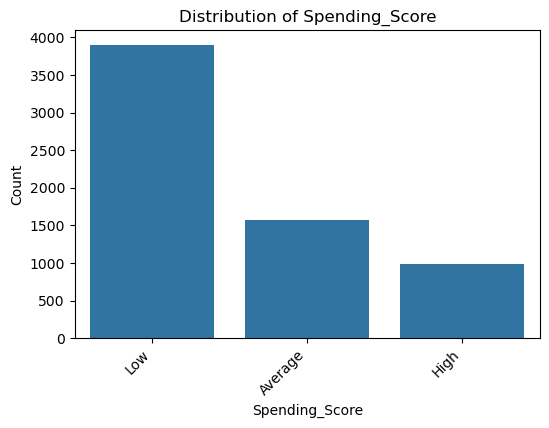

Frequency Distribution for Spending_Score:
________________________________________
                Count  Frequency_Ratio (%)
Spending_Score                            
Low              3900                 60.4
Average          1570                 24.3
High              984                 15.2



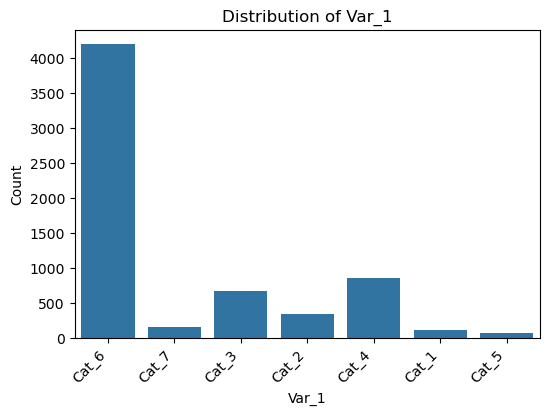

Frequency Distribution for Var_1:
________________________________________
       Count  Frequency_Ratio (%)
Var_1                            
Cat_6   4199                 65.7
Cat_4    852                 13.3
Cat_3    668                 10.4
Cat_2    342                  5.3
Cat_7    160                  2.5
Cat_1    112                  1.8
Cat_5     61                  1.0



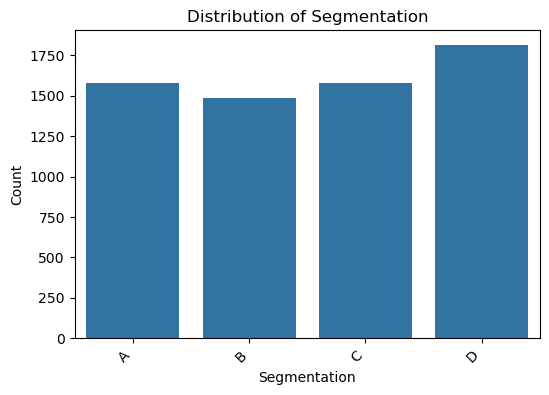

Frequency Distribution for Segmentation:
________________________________________
              Count  Frequency_Ratio (%)
Segmentation                            
D              1814                 28.1
A              1578                 24.4
C              1576                 24.4
B              1486                 23.0



In [268]:
# nominal EDA

def plot_bar(df, column):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.show()

def check_frequency(df, column):
    frequency = df[column].value_counts()
    frequency_ratios = round(df[column].value_counts(normalize=True) * 100, 1)
    freq_df = pd.DataFrame({
        'Count': frequency,
        'Frequency_Ratio (%)': frequency_ratios
    })
    print(f"Frequency Distribution for {column}:\n{'_'*40}\n{freq_df}\n")



for col in nominal_df.columns:
    plot_bar(nominal_df, col)
    check_frequency(nominal_df, col)

In [266]:
# End time
end = time()
elapsed_time = end - start

# Convert elapsed time into hours, minutes, and seconds
hours, rem = divmod(elapsed_time, 3600)
minutes, seconds = divmod(rem, 60)

# Print formatted time
print(f'Script run time: {int(hours):02}:{int(minutes):02}:{int(seconds):02} (hh:mm:ss)')

Script run time: 00:00:08 (hh:mm:ss)


#### Save to html

In [267]:
# Load the notebook
with open('phase2_eda.ipynb') as f:
    notebook = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(notebook)

# Path to the directory you want to create
dir_path = "htmls/"

# Check if the directory exists and create it if it doesn't
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    print(f"Directory '{dir_path}' created.")

# Write the output to an HTML file
with open(dir_path + 'phase2_eda.html', 'w') as f:
    f.write(html_data)